# <center> <u> Boundary Value Problems </u> </center> 

In [1]:
import numpy as np
from numba import jit

import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
sns.set_theme(
    style = "darkgrid",
    palette = "bright",
)

plt.rc('figure', figsize = (12, 6))

## <center> Laplace Equation </center> 

## <center> $ \nabla^{2} \phi = 0 $ </center> 

## <center> $ \frac{\partial^{2} \phi}{\partial x^{2}} + \frac{\partial^{2} \phi}{\partial y^{2}} = 0 $ </center> 

## <center> Second Order Finite Difference </center>

## <center> $ \frac{\partial^{2} \phi}{\partial x^{2}} = \frac{\phi(x + a, y) + \phi(x - a, y) - 2 \cdot \phi(x, y)}{a^{2}} $ </center> 

## <center> $ \frac{\partial^{2} \phi}{\partial y^{2}} = \frac{\phi(x, y + a) + \phi(x, y - a) - 2 \cdot \phi(x, y)}{a^{2}} $ </center> 

## <center> Final Solution </center> 

## <center> $ \frac{\partial^{2} \phi}{\partial x^{2}} + \frac{\partial^{2} \phi}{\partial y^{2}} = \frac{\partial^{2} \phi}{\partial x^{2}} = \frac{\phi(x + a, y) + \phi(x - a, y) + \phi(x, y + a) + \phi(x, y - a) - 4 \cdot \phi(x, y)}{a^{2}} $ </center>

## <center> $ \phi(x + a, y) + \phi(x - a, y) + \phi(x, y + a) + \phi(x, y - a) - 4 \cdot \phi(x, y) = 0 $ </center>

## <center> Relaxation Method </center> 

## <center> $ \phi(x, y) = \frac{1}{4} \cdot [\phi(x + a, y) + \phi(x - a, y) + \phi(x, y + a) + \phi(x, y - a)] $ </center>

In [3]:
@jit(nopython = True)
def relaxation_method():
    """
    Solves the Maxwell Equation
    """
    M = 100
    V = 1
    err_tol = 1e-3

    phi = np.zeros((M+1, M+1), dtype = float)
    phi[0, :] = V
    phi_prime = np.zeros((M+1, M+1), dtype = float)

    delta = 1
    while delta > err_tol:

        for i in range(M+1):
            for j in range(M+1):

                if i == 0 or i == M or j == 0 or j == M:
                    phi_prime[i, j] = phi[i, j]
                else: 
                    phi_prime[i, j] = (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4

        delta = np.max(np.abs(phi - phi_prime))
        phi, phi_prime = phi_prime, phi
    
    return phi

In [4]:
%%timeit 
relaxation_method()

3.77 ms ± 15.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
laplace_equation = relaxation_method()

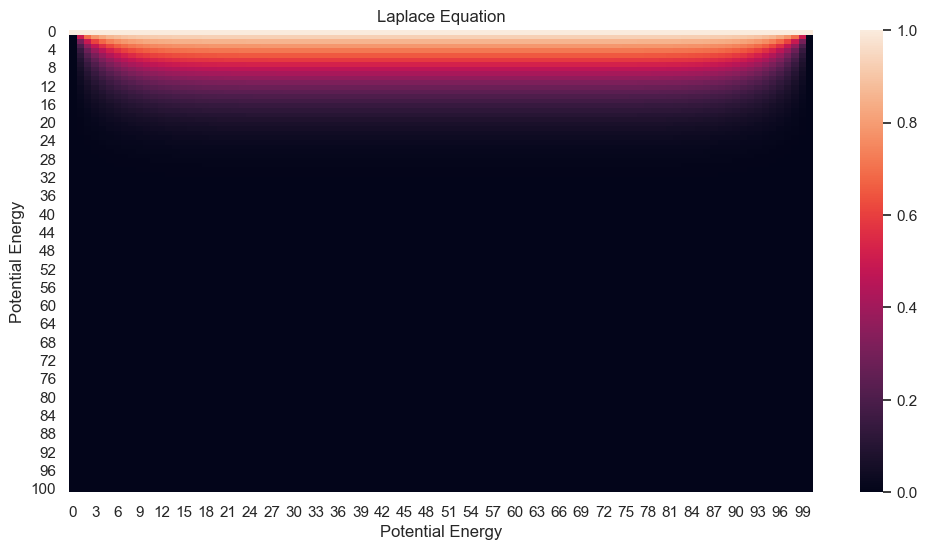

In [6]:
ax = sns.heatmap(laplace_equation)

ax.set(
    title = "Laplace Equation",
    xlabel = "Potential Energy",
    ylabel = "Potential Energy",
)

plt.show()

## <center> Poisson Equation </center> 

## <center> $ \nabla^{2} \phi = -\frac{\rho}{\epsilon_{0}} $ </center> 

## <center> $ \phi(x, y) = \frac{\phi(x + a, y) + \phi(x - a, y) + \phi(x, y + a) + \phi(x, y - a)}{4} + \frac{a^{2}}{4 \epsilon_{0}} \rho(x, y) $ </center>

In [7]:
@jit(nopython = True)
def relaxation_method():
    """
    Solves the Poisson Equation
    """
    M = 100
    V = 1
    err_tol = 1e-3

    phi = np.zeros((M+1, M+1), dtype = float)
    rho = np.zeros((M+1, M+1), dtype = float)
    rho[20, 80] = -1
    rho[80, 20] = 1
    phi_prime = np.zeros((M+1, M+1), dtype = float)

    delta = 1
    while delta > err_tol:

        for i in range(M+1):
            for j in range(M+1):

                if i == 0 or i == M or j == 0 or j == M:
                    phi_prime[i, j] = phi[i, j]
                else: 
                    phi_prime[i, j] = (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4 + (1 / 4) * rho[i, j]

        delta = np.max(np.abs(phi - phi_prime))
        phi, phi_prime = phi_prime, phi
    
    return phi

In [8]:
%%timeit 
relaxation_method()

2.73 ms ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
poisson_equation = relaxation_method()

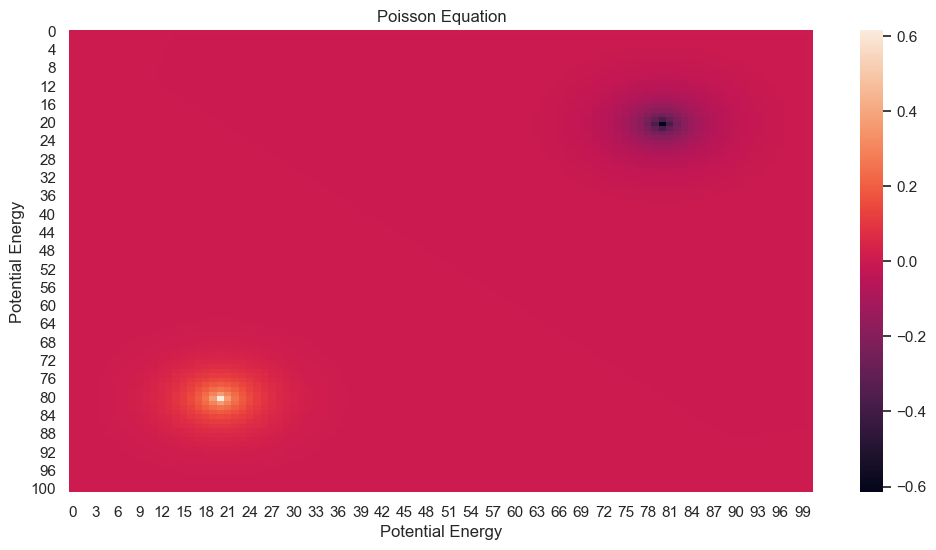

In [10]:
ax = sns.heatmap(poisson_equation)

ax.set(
    title = "Poisson Equation",
    xlabel = "Potential Energy",
    ylabel = "Potential Energy",
)

plt.show()